# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [124]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [148]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [126]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"
# Define an empty list to fetch the weather data for each city
city_data = []


In [127]:
# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")


# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({
            "City" :city,
            "Lat" :city_lat,
            "Lng" :city_lng,
            "Max Temp" :city_max_temp,
            "Humidity" :city_humidity,
            "Cloudiness" :city_clouds,
            "Windspeed" :city_wind,
            "Country" :city_country,
            "Date" :city_date  
        })

     # If an error is experienced, skip the city
    except:
        print("City not found. Skipping ...")
        pass
# Indicate that data loading is complete
print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | kodiak
Processing Record 2 of Set 1 | carnarvon
Processing Record 3 of Set 1 | mirnyy
Processing Record 4 of Set 1 | extrema
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | callao
Processing Record 8 of Set 1 | college
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | puerto natales
Processing Record 11 of Set 1 | port douglas
Processing Record 12 of Set 1 | talnakh
Processing Record 13 of Set 1 | bafq
Processing Record 14 of Set 1 | ust-nera
Processing Record 15 of Set 1 | haiku-pauwela
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | vingt cinq
City not found. Skipping ...
Processing Record 18 of Set 1 | nar'yan-mar
Processing Record 19 of Set 1 | 'ohonua
City not found. Skipping ...
Processing Record 20 of Set 1 | pionerskiy
Processing Record 21 of Set 1 | alcains
Processing 

In [128]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Windspeed     571
Country       571
Date          571
dtype: int64

In [129]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,kodiak,57.7900,-152.4072,42.31,81,100,6.91,US,1683407187
1,carnarvon,-24.8667,113.6333,70.27,71,11,10.63,AU,1683407281
2,mirnyy,62.5353,113.9611,27.46,93,100,16.20,RU,1683407282
3,extrema,-22.8547,-46.3183,65.43,92,100,2.35,BR,1683407282
4,port-aux-francais,-49.3500,70.2167,39.85,60,77,29.57,TF,1683407282


In [130]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [131]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,42.31,81,100,6.91,US,1683407187
1,carnarvon,-24.8667,113.6333,70.27,71,11,10.63,AU,1683407281
2,mirnyy,62.5353,113.9611,27.46,93,100,16.20,RU,1683407282
3,extrema,-22.8547,-46.3183,65.43,92,100,2.35,BR,1683407282
4,port-aux-francais,-49.3500,70.2167,39.85,60,77,29.57,TF,1683407282


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [132]:
latitude = city_data_df["Lat"]
maiximum_temp = city_data_df["Max Temp"]
humid = city_data_df["Humidity"]
clouds = city_data_df["Cloudiness"]
winds = city_data_df["Windspeed"]

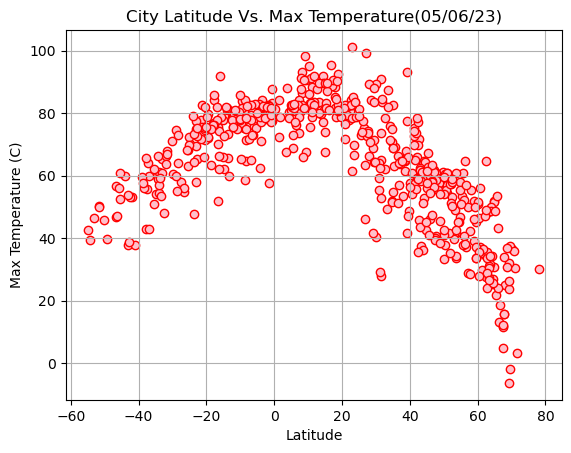

In [133]:


# Build scatter plot for latitude vs. temperature
plt.scatter(latitude, maiximum_temp, color= "pink", edgecolors= "red" )

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()



#### Latitude Vs. Humidity

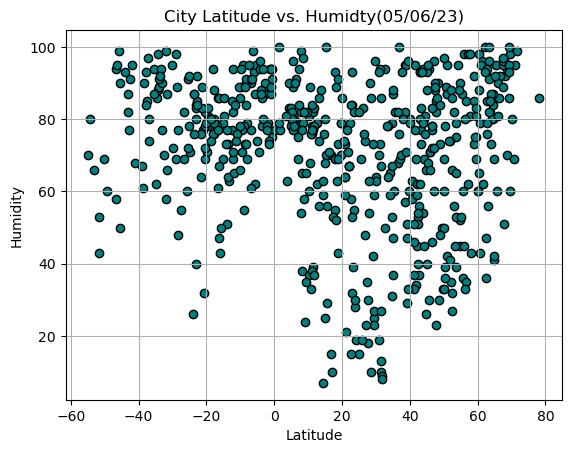

In [134]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(latitude, humid, color="teal", edgecolors= 'black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidty(%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

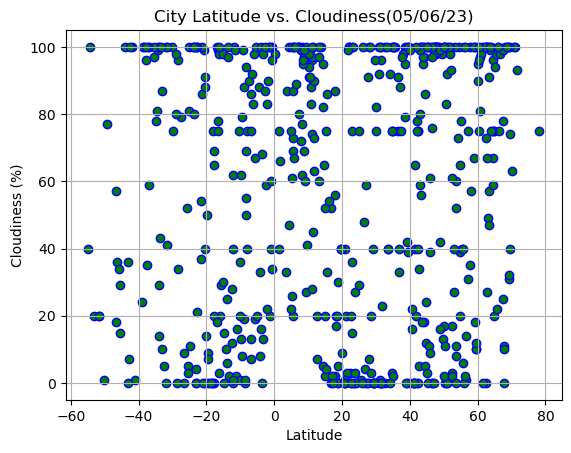

In [135]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(latitude, clouds, color = "green", edgecolors= "blue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness(%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

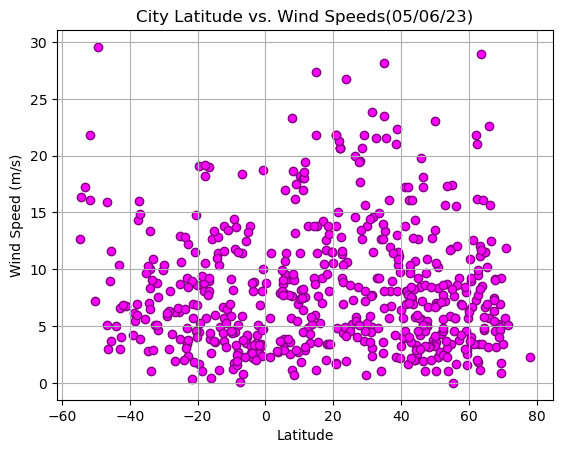

In [136]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(latitude, winds, color = "magenta", edgecolors="purple")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speeds(%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [137]:
# Define a function to create Linear Regression plots
def lin_reg_plot(x_values, y_values, title, txt_position):

    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,txt_position)
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [138]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,42.31,81,100,6.91,US,1683407187
2,mirnyy,62.5353,113.9611,27.46,93,100,16.20,RU,1683407282
7,college,64.8569,-147.8028,51.75,41,75,11.50,US,1683407283
11,talnakh,69.4865,88.3972,-1.97,98,74,1.72,RU,1683407284
12,bafq,31.6128,55.4107,73.63,13,0,3.09,IR,1683407284


In [139]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
City_ID,,,,,,,,,
1,carnarvon,-24.8667,113.6333,70.27,71,11,10.63,AU,1683407281
3,extrema,-22.8547,-46.3183,65.43,92,100,2.35,BR,1683407282
4,port-aux-francais,-49.3500,70.2167,39.85,60,77,29.57,TF,1683407282
5,adamstown,-25.0660,-130.1015,72.28,78,100,8.68,PN,1683407116
6,callao,-12.0667,-77.1500,75.49,69,0,13.80,PE,1683407282


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8454574683555872


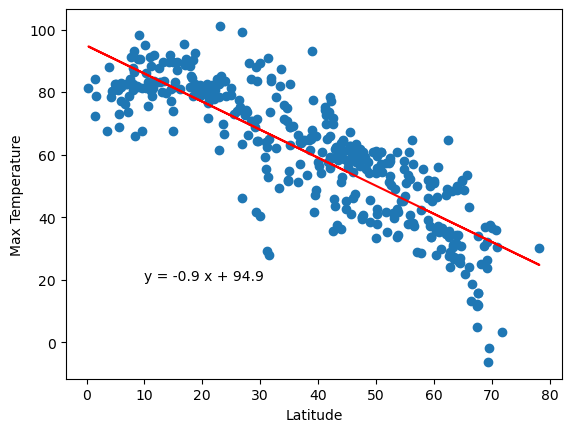

In [140]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Max Temp"]

lin_reg_plot(x_axis,y_axis, title= "Max Temperature", txt_position=(10, 20))

The r-squared is: 0.7938436756229506


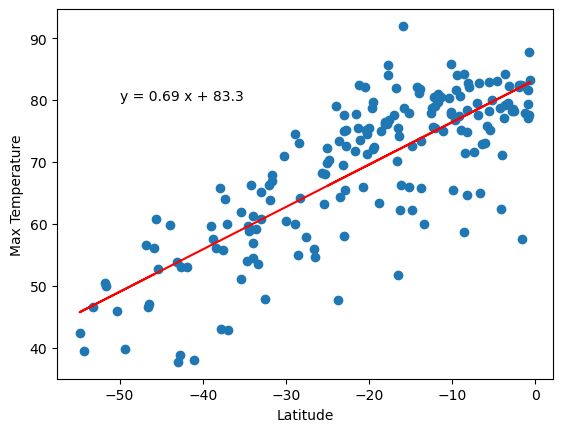

In [141]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Max Temp"]

lin_reg_plot(x_axis, y_axis, title = "Max Temperature", txt_position= (-50, 80))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

The r-value of Latitude vs Temperature for the Northern Hemisphere is -0.8454. Which means that the r-value suggests theres is a strong negative coorealtion between the Latitude and the Temperature for the North Hemisphere.

The r-value of Latitude vs Temperature for the Southern Hemisphere is 0.7938 . Which means that the r-value suggests theres is a positive coorealtion between the Latitude and the Temperature for the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.14284754978532707


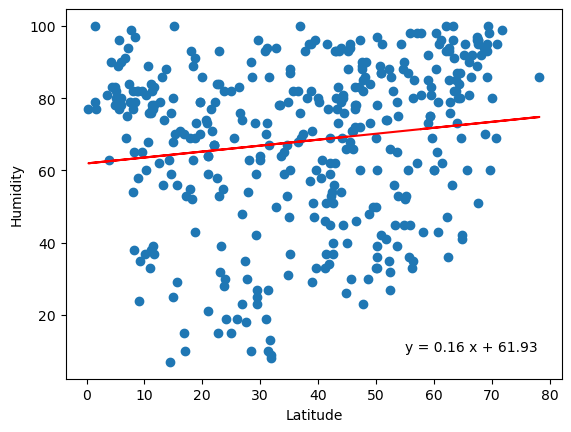

In [142]:
# Northern Hemisphere
# YOUR CODE HERE

x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Humidity"]

lin_reg_plot(x_axis, y_axis, title="Humidity", txt_position=(55,10))

The r-squared is: 0.11310196102672256


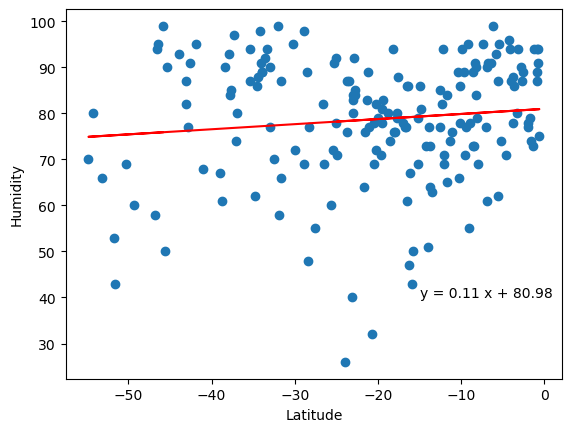

In [143]:
# Southern Hemisphere
# YOUR CODE HERE

x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df ["Humidity"]

lin_reg_plot(x_axis, y_axis, title="Humidity", txt_position= (-15, 40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The r-value of Latitude vs Humidity for the Northern Hemisphere is 0.1428. Which means that the r-value suggests theres is a weak positive coorealtion between the Latitude and the Humidity for the North Hemisphere.

The r-value of Latitude vs Humidity for the Southern Hemisphere is 0.1131. Which means that the r-value suggests theres is a weak positive coorealtion between the Latitude and the Humidity for the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.05671204965188177


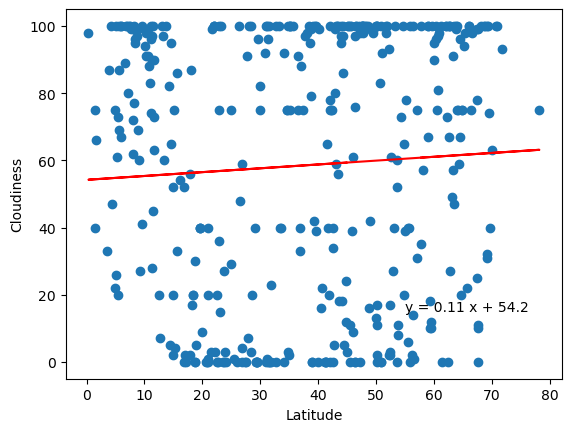

In [144]:
# Northern Hemisphere
# YOUR CODE HERE

x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Cloudiness"]

lin_reg_plot(x_axis, y_axis, title="Cloudiness", txt_position=(55,15))

The r-squared is: 0.009706636065359585


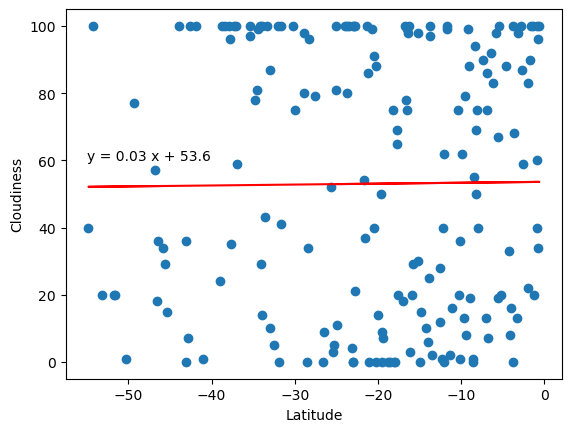

In [145]:
# Southern Hemisphere
# YOUR CODE HERE

x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Cloudiness"]

lin_reg_plot(x_axis, y_axis, title="Cloudiness", txt_position=(-55,60))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The r-value of Latitude vs Cloudiness for the Northern Hemisphere is 0.0567. Which means that the r-value suggests theres is a very weak positive coorealtion between the Latitude and the Cloudiness for the North Hemisphere.

The r-value of Latitude vs Cloudiness for the Southern Hemisphere is 0.0097. Which means that the r-value suggests theres is a very weak positive coorealtion between the Latitude and the Cloudiness for the Southern Hemisphere

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: -0.1372318613460248


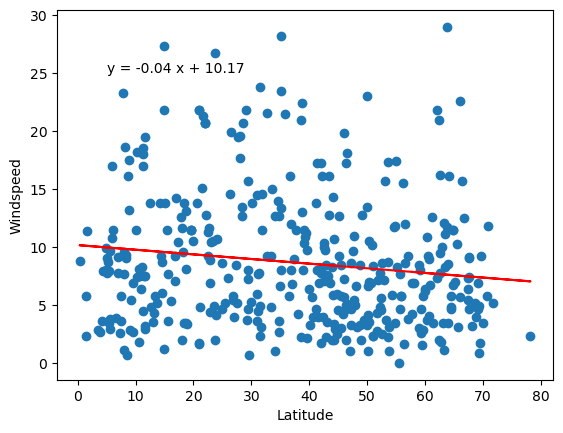

In [146]:
# Northern Hemisphere
# YOUR CODE HERE

x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Windspeed"]

lin_reg_plot(x_axis, y_axis, title="Windspeed", txt_position=(5, 25))

The r-squared is: -0.25570280279117674


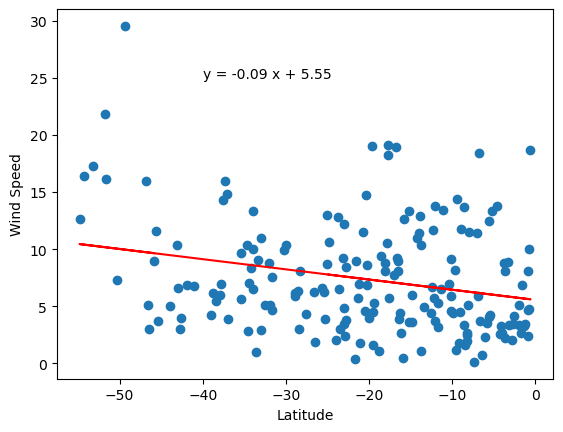

In [147]:
# Southern Hemisphere
# YOUR CODE HERE

x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Windspeed"]

lin_reg_plot(x_axis, y_axis, title="Wind Speed", txt_position=(-40, 25))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The r-value of Latitude vs Wind Speed for the Northern Hemisphere is -0.1372. Which means that the r-value suggests theres is a weak negative coorealtion between the Latitude and the Wind Speed for the North Hemisphere.

The r-value of Latitude vs Wind Speed for the Southern Hemisphere is -0.2557. Which means that the r-value suggests theres is a weak negative coorealtion between the Latitude and the Wind Speed for the Southern Hemisphere.